In [1278]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1279]:
#Next we will read the dataset
#Please change the path of the file before execution
filepath = r'D:\Personal\IIITB PG\Advanced Regression\train.csv'
housing_dataset = pd.read_csv(filepath)
housing_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Next we will analyze the dataset and perform EDA

In [1280]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1281]:
housing_dataset.shape

(1460, 81)

In [1282]:
housing_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the above result we can see that there are outliers present in LotArea, LotFrontage, MasVnrArea, BsmtFinSF1 

In [1283]:
# Here I am trying to find if there are any null values in the dataset
for column in housing_dataset.columns:
    print(column,':',housing_dataset[column].isna().sum())

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF :

From the above result, we can see that there are few fields where there are nan values. But, for some columns listed below, these nan values have some meaning from the data dictionary.  
Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature
So, here will impute the actual meaningful values first

In [1284]:
# Imputing meaningfull values instead of nan values
housing_dataset['Alley'] = housing_dataset['Alley'].fillna('No alley access')
housing_dataset['BsmtQual'] = housing_dataset['BsmtQual'].fillna('No basement')
housing_dataset['BsmtCond'] = housing_dataset['BsmtCond'].fillna('No basement')
housing_dataset['BsmtExposure'] = housing_dataset['BsmtExposure'].fillna('No basement')
housing_dataset['BsmtFinType1'] = housing_dataset['BsmtFinType1'].fillna('No basement')
housing_dataset['BsmtFinType2'] = housing_dataset['BsmtFinType2'].fillna('No basement')
housing_dataset['FireplaceQu'] = housing_dataset['FireplaceQu'].fillna('No fireplace')
housing_dataset['GarageType'] = housing_dataset['GarageType'].fillna('No garage')
housing_dataset['GarageFinish'] = housing_dataset['GarageFinish'].fillna('No garage')
housing_dataset['GarageQual'] = housing_dataset['GarageQual'].fillna('No garage')
housing_dataset['GarageCond'] = housing_dataset['GarageCond'].fillna('No garage')
housing_dataset['PoolQC'] = housing_dataset['PoolQC'].fillna('No pool')
housing_dataset['Fence'] = housing_dataset['Fence'].fillna('No fence')
housing_dataset['MiscFeature'] = housing_dataset['MiscFeature'].fillna('No misc feature')
housing_dataset['MasVnrType'] = housing_dataset['MasVnrType'].fillna('No type')

In [1285]:
# Checking again for nan values in the dataset after nan values imputation
for column in housing_dataset.columns:
    null_per = round(100*(housing_dataset[column].isna().sum()/len(housing_dataset)),2)
    if null_per>0:
        print(column,':',null_per)

LotFrontage : 17.74
MasVnrArea : 0.55
Electrical : 0.07
GarageYrBlt : 5.55


From the above result, we can identify the columns which have nan values, so let's handle them. For numeric columns, lets check 
if there are outliers to decide on mean/median to impute

In [1286]:
housing_dataset['LotFrontage'].quantile([0.25,0.5,0.75,0.9,0.99])

0.25     59.0
0.50     69.0
0.75     80.0
0.90     96.0
0.99    141.0
Name: LotFrontage, dtype: float64

In [1287]:
housing_dataset['MasVnrArea'].quantile([0.25,0.5,0.75,0.9,0.99])

0.25      0.00
0.50      0.00
0.75    166.00
0.90    335.00
0.99    791.92
Name: MasVnrArea, dtype: float64

In [1288]:
#Since LotFrontage and MasVnrArea is numeric and has outliers in it, we will impute median value in it
housing_dataset['LotFrontage'] = housing_dataset['LotFrontage'].fillna(housing_dataset['LotFrontage'].median())
housing_dataset['MasVnrArea'] = housing_dataset['MasVnrArea'].fillna(housing_dataset['MasVnrArea'].median())
#Since Electrical and GarageYrBlt are categorical, we will impute mode value in it
housing_dataset['Electrical'].fillna(housing_dataset['Electrical'].mode().iloc[0], inplace = True)
housing_dataset['GarageYrBlt'].fillna(housing_dataset['GarageYrBlt'].mode().iloc[0], inplace = True)

From the data dictionary we can see that there are some columns (listed below) whose values are numeric though they represent categories. So, we will change the datatype of these columns
MSSubClass
OverallQual
OverallCond

In [1289]:
housing_dataset['MSSubClass'] = housing_dataset['MSSubClass'].astype('object')
housing_dataset['OverallQual'] = housing_dataset['OverallQual'].astype('object')
housing_dataset['OverallCond'] = housing_dataset['OverallCond'].astype('object')

In [1290]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 

There are some columns in the dataset which represent some year, however we will not get any information from that only.
If we subtract the year from the max value of year of that column, it will provide us no of years. So, let's do that.
Columns are : YearBuilt YearRemodAdd GarageYrBlt YrSold 

In [1291]:
housing_dataset['YearBuilt_in_years'] = housing_dataset['YearBuilt'].max() - housing_dataset['YearBuilt']
housing_dataset['YearRemodAdd_in_years'] = housing_dataset['YearRemodAdd'].max() - housing_dataset['YearRemodAdd']
housing_dataset['GarageYrBlt_in_years'] = housing_dataset['GarageYrBlt'].max() - housing_dataset['GarageYrBlt']
housing_dataset['YrSold_in_years'] = housing_dataset['YrSold'].max() - housing_dataset['YrSold']

Let's delete the year columns and the id column from the dataset

In [1292]:
housing_dataset.drop(columns=['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],inplace=True)

In [1293]:
housing_dataset.shape

(1460, 80)

Next, we will check the variance of values in categorical columns to decide whether to keep the column or not.

In [1294]:
#Considering only categorical columns
df_categ_columns = housing_dataset.select_dtypes(include ='object')
categ_list = df_categ_columns.columns

In [1295]:
#Analyzing the values of the categorical columns
for c in categ_list:
    print(c)
    print(round(100*(df_categ_columns[c].value_counts()/len(df_categ_columns[c]))),2)

MSSubClass
20     37.0
60     20.0
50     10.0
120     6.0
30      5.0
160     4.0
70      4.0
80      4.0
90      4.0
190     2.0
85      1.0
75      1.0
45      1.0
180     1.0
40      0.0
Name: MSSubClass, dtype: float64 2
MSZoning
RL         79.0
RM         15.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 2
Street
Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 2
Alley
No alley access    94.0
Grvl                3.0
Pave                3.0
Name: Alley, dtype: float64 2
LotShape
Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 2
LandContour
Lvl    90.0
Bnk     4.0
HLS     3.0
Low     2.0
Name: LandContour, dtype: float64 2
Utilities
AllPub    100.0
NoSeWa      0.0
Name: Utilities, dtype: float64 2
LotConfig
Inside     72.0
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 2
LandSlope
Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64 2
Neighborhood

From the above results, we can see that below columns provide negligible variance to the dataset

MSZoning, Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Functional, GarageQual, GarageCond, PoolQC, MiscFeature, SaleType

So, we will drop these columns from the dataset

In [1296]:
col_to_be_deleted_1 = ['MSZoning','Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Functional','GarageQual','GarageCond','PoolQC','Electrical','MiscFeature','PavedDrive','Fence','SaleCondition','SaleType','Exterior2nd','OverallQual']
housing_dataset.drop(columns=col_to_be_deleted_1,inplace=True)

In [1297]:
housing_dataset.shape

(1460, 54)

We can also see that for some categorical columns, some values comprise of only <=5% in that column, so will combine the values in that column

In [1298]:
MSSubClass_list = [20,50,60]
housing_dataset['MSSubClass']=housing_dataset['MSSubClass'].apply(lambda x:x if x in MSSubClass_list else 'others')
LotShape_list = ['Reg','IR1']
housing_dataset['LotShape']=housing_dataset['LotShape'].apply(lambda x:x if x in LotShape_list else 'others')
HouseStyle_list = ['1Story','2Story']
housing_dataset['HouseStyle']=housing_dataset['HouseStyle'].apply(lambda x:x if x in HouseStyle_list else 'others')
RoofStyle_list = ['Gable','Hip']
housing_dataset['RoofStyle']=housing_dataset['RoofStyle'].apply(lambda x:x if x in RoofStyle_list else 'others')
RoofStyle_list = ['Gable','Hip']
housing_dataset['RoofStyle']=housing_dataset['RoofStyle'].apply(lambda x:x if x in RoofStyle_list else 'others')
Exterior1st_list=['VinylSd','HdBoard','MetalSd','Wd Sdng']
housing_dataset['Exterior1st']=housing_dataset['Exterior1st'].apply(lambda x:x if x in Exterior1st_list else 'others')
MasVnrType_list = ['None','BrkFace']
housing_dataset['MasVnrType']=housing_dataset['MasVnrType'].apply(lambda x:x if x in MasVnrType_list else 'others')
ExterQual_list = ['TA','Gd']
housing_dataset['ExterQual']=housing_dataset['ExterQual'].apply(lambda x:x if x in ExterQual_list else 'others')
Foundation_list = ['PConc','CBlock']
housing_dataset['Foundation']=housing_dataset['Foundation'].apply(lambda x:x if x in Foundation_list else 'others')
BsmtQual_list = ['TA','Gd']
housing_dataset['BsmtQual']=housing_dataset['BsmtQual'].apply(lambda x:x if x in BsmtQual_list else 'others')
BsmtExposure_list = ['No','Av']
housing_dataset['BsmtExposure']=housing_dataset['BsmtExposure'].apply(lambda x:x if x in BsmtExposure_list else 'others')
BsmtFinType1_list = ['Unf','GLQ']
housing_dataset['BsmtFinType1']=housing_dataset['BsmtFinType1'].apply(lambda x:x if x in BsmtFinType1_list else 'others')
HeatingQC_list = ['Ex','TA']
housing_dataset['HeatingQC']=housing_dataset['HeatingQC'].apply(lambda x:x if x in HeatingQC_list else 'others')
KitchenQual_list = ['TA','Gd']
housing_dataset['KitchenQual']=housing_dataset['KitchenQual'].apply(lambda x:x if x in KitchenQual_list else 'others')
FireplaceQu_list = ['TA','Gd','No fireplace']
housing_dataset['FireplaceQu']=housing_dataset['FireplaceQu'].apply(lambda x:x if x in FireplaceQu_list else 'others')
GarageType_list = ['Attchd','Detchd']
housing_dataset['GarageType']=housing_dataset['GarageType'].apply(lambda x:x if x in GarageType_list else 'others')


There are some fields for which there are similar values, this will cause issue during creating dummies for categ columns.
So, we will rename them

In [1299]:
#col_list_3 = ['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu']
#values_list = ['TA','Gd']
#for col in col_list_3:
#    housing_dataset[col]=housing_dataset[col].apply(lambda x:x if x not in values_list else (col+x))

In [1300]:
#Considering only categorical columns
df_categ_columns = housing_dataset.select_dtypes(include ='object')
categ_list = df_categ_columns.columns
#Analyzing the values of the categorical columns Delete this step
for c in categ_list:
    print(c)
    print(round(100*(df_categ_columns[c].value_counts()/len(df_categ_columns[c]))),2)

MSSubClass
20        37.0
others    33.0
60        20.0
50        10.0
Name: MSSubClass, dtype: float64 2
LotShape
Reg       63.0
IR1       33.0
others     3.0
Name: LotShape, dtype: float64 2
LotConfig
Inside     72.0
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 2
Neighborhood
NAmes      15.0
CollgCr    10.0
OldTown     8.0
Edwards     7.0
Somerst     6.0
Gilbert     5.0
NridgHt     5.0
Sawyer      5.0
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     3.0
Mitchel     3.0
NoRidge     3.0
Timber      3.0
IDOTRR      3.0
ClearCr     2.0
SWISU       2.0
StoneBr     2.0
Blmngtn     1.0
MeadowV     1.0
BrDale      1.0
Veenker     1.0
NPkVill     1.0
Blueste     0.0
Name: Neighborhood, dtype: float64 2
BldgType
1Fam      84.0
TwnhsE     8.0
Duplex     4.0
Twnhs      3.0
2fmCon     2.0
Name: BldgType, dtype: float64 2
HouseStyle
1Story    50.0
2Story    30.0
others    20.0
Name: HouseStyle, dtype: float64 2
OverallCond
5    56.0
6  

Let's check for outliers next by checking the quantile values
Also, we noticed previously that there are columns which have too much 0 values, we will add the columns into a list which has 50% of records as value 0

In [1301]:
df_numerical_columns = housing_dataset.select_dtypes(include =['int64','float64'])
zero_numerical_columns = []
for col in df_numerical_columns:
    print(col)
    print(housing_dataset[col].quantile([0.25,0.5,0.75,0.9,0.99]))
    if housing_dataset[col].quantile(0.5) == 0:
        zero_numerical_columns.append(col)

LotFrontage
0.25     60.00
0.50     69.00
0.75     79.00
0.90     92.00
0.99    137.41
Name: LotFrontage, dtype: float64
LotArea
0.25     7553.50
0.50     9478.50
0.75    11601.50
0.90    14381.70
0.99    37567.64
Name: LotArea, dtype: float64
MasVnrArea
0.25      0.00
0.50      0.00
0.75    164.25
0.90    335.00
0.99    791.28
Name: MasVnrArea, dtype: float64
BsmtFinSF1
0.25       0.00
0.50     383.50
0.75     712.25
0.90    1065.50
0.99    1572.41
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2
0.25      0.00
0.50      0.00
0.75      0.00
0.90    117.20
0.99    830.38
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF
0.25     223.00
0.50     477.50
0.75     808.00
0.90    1232.00
0.99    1797.05
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF
0.25     795.75
0.50     991.50
0.75    1298.25
0.90    1602.20
0.99    2155.05
Name: TotalBsmtSF, dtype: float64
1stFlrSF
0.25     882.00
0.50    1087.00
0.75    1391.25
0.90    1680.00
0.99    2219.46
Name: 1stFlrSF, dtype: float64
2ndFlrSF
0.25       0.00
0

In [1302]:
zero_numerical_columns

['MasVnrArea',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [1303]:
# Lets calculate the percentage of 0 values in the above columns
col_to_be_deleted_2 = []
for col in zero_numerical_columns:
    zero_per = round(100*(np.sum(housing_dataset[col]==0)/len(housing_dataset[zero_col])),2)
    print(col, ':', zero_per)
    if zero_per > 85:
        col_to_be_deleted_2.append(col)

MasVnrArea : 59.52
BsmtFinSF2 : 88.56
2ndFlrSF : 56.78
LowQualFinSF : 98.22
BsmtFullBath : 58.63
BsmtHalfBath : 94.38
HalfBath : 62.53
WoodDeckSF : 52.12
EnclosedPorch : 85.75
3SsnPorch : 98.36
ScreenPorch : 92.05
PoolArea : 99.52
MiscVal : 96.44


From the above result, we can see that there are columns with more than 85% 0 values. Since they dont provide any variance to the dataset, let's delete them


In [1304]:
col_to_be_deleted_2

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [1305]:
housing_dataset.drop(columns=col_to_be_deleted_2,inplace=True)

In [1306]:
housing_dataset.shape

(1460, 46)

In [1307]:
# Lets check for outliers again with reduced set of columns
df_numerical_columns = housing_dataset.select_dtypes(include =['int64','float64'])
for col in df_numerical_columns:
    print(col)
    print(housing_dataset[col].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99]))

LotFrontage
0.10     49.00
0.25     60.00
0.50     69.00
0.75     79.00
0.90     92.00
0.95    104.00
0.99    137.41
Name: LotFrontage, dtype: float64
LotArea
0.10     5000.00
0.25     7553.50
0.50     9478.50
0.75    11601.50
0.90    14381.70
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64
MasVnrArea
0.10      0.00
0.25      0.00
0.50      0.00
0.75    164.25
0.90    335.00
0.95    456.00
0.99    791.28
Name: MasVnrArea, dtype: float64
BsmtFinSF1
0.10       0.00
0.25       0.00
0.50     383.50
0.75     712.25
0.90    1065.50
0.95    1274.00
0.99    1572.41
Name: BsmtFinSF1, dtype: float64
BsmtUnfSF
0.10      74.90
0.25     223.00
0.50     477.50
0.75     808.00
0.90    1232.00
0.95    1468.00
0.99    1797.05
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF
0.10     636.90
0.25     795.75
0.50     991.50
0.75    1298.25
0.90    1602.20
0.95    1753.00
0.99    2155.05
Name: TotalBsmtSF, dtype: float64
1stFlrSF
0.10     756.90
0.25     882.00
0.50    1087.00
0.75    1391.25
0.

From the above result, we can see that below columns have outliers in them and needs to be treated

LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, SalePrice, YearBuilt_in_years, GarageYrBlt_in_years

We will cap the value at 0.95 quantile.

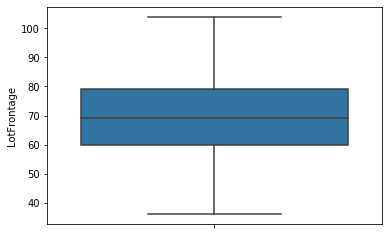

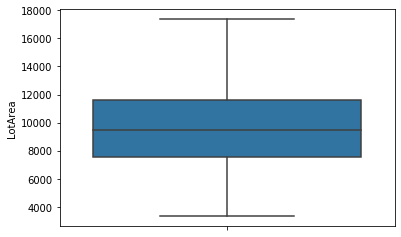

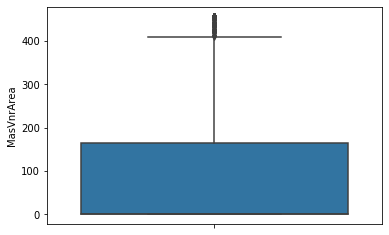

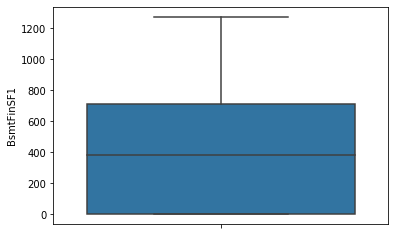

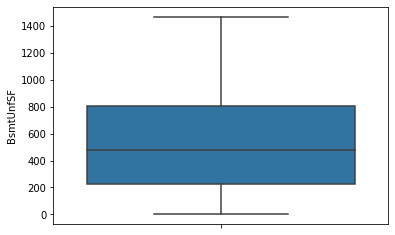

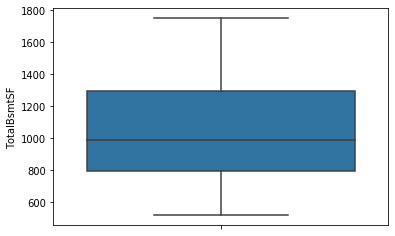

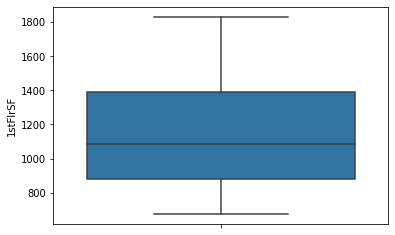

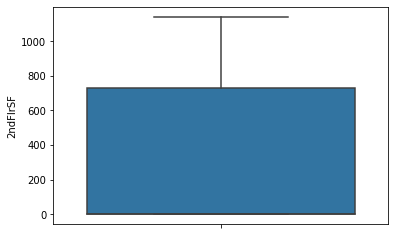

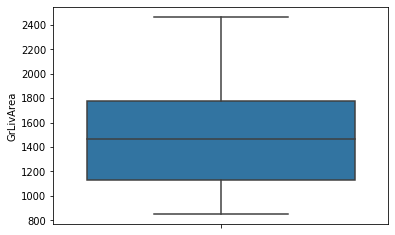

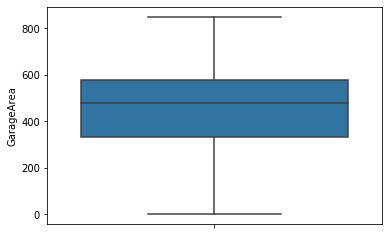

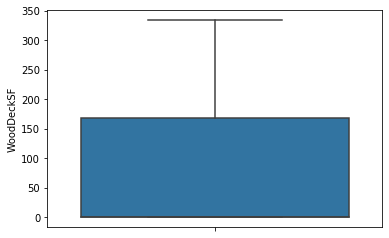

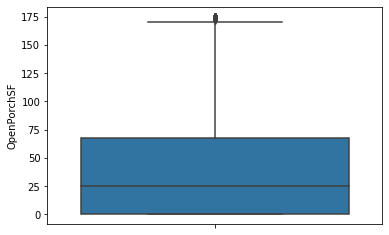

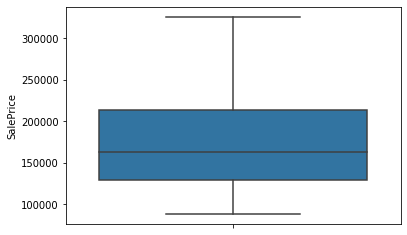

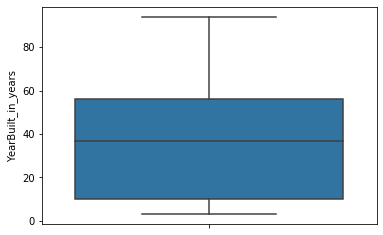

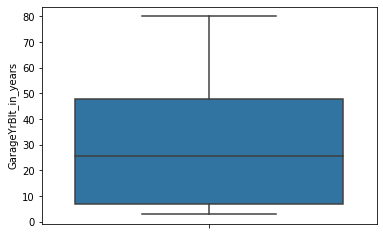

In [1308]:
outlier_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice','YearBuilt_in_years','GarageYrBlt_in_years']
for col in outlier_columns:
    q=housing_dataset[col].quantile(0.95)
    a=housing_dataset[col].quantile(0.05)
    housing_dataset[col]=housing_dataset[col].apply(lambda x:x if x<q else q)
    housing_dataset[col]=housing_dataset[col].apply(lambda x:x if x>a else a)
    sns.boxplot(y=col,data=housing_dataset)
    plt.show()

Next, let's check multicollinearity between the columns

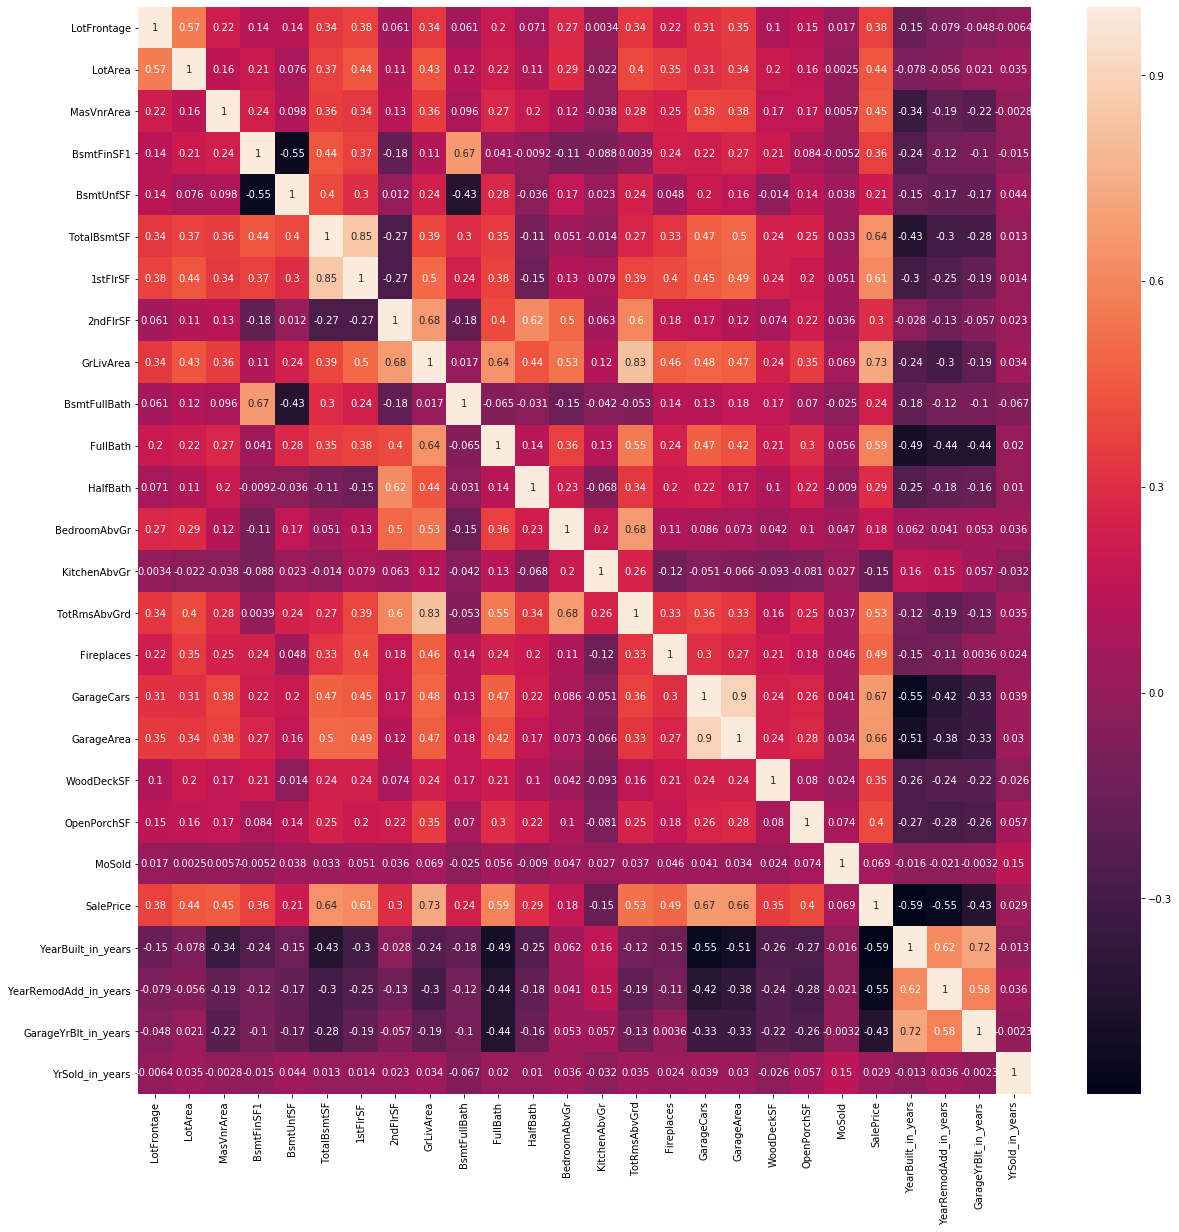

In [1309]:
plt.figure(figsize = (20,20))
sns.heatmap(housing_dataset.corr(),annot = True)
plt.show()

From the above heatmap, we can see that there is high collinearity between below columns

GarageArea and GarageCars
GrLivArea and TotRmsAbvGrd
1stFlrSF and TotalBsmtSF

So, we will remove one of the columns from each pair

In [1310]:
# Deleting the columns from above step
housing_dataset.drop(columns=['GarageCars','TotRmsAbvGrd','1stFlrSF'],inplace=True)

Let's analyze the distribution of target variable

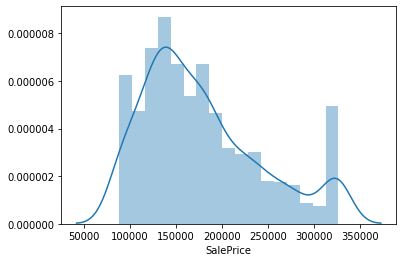

In [1311]:
sns.distplot(housing_dataset['SalePrice'])
plt.show()

In [1312]:
#Applying log transformation to target variable to eliminate the skewness
housing_dataset['SalePrice'] = np.log(housing_dataset['SalePrice'])
sns.distplot(housing_dataset['SalePrice'])
plt.show()

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.694959
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.385092
          ...    
1430    12.165980
1431    11.875831
1432    11.385092
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.694959
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.385092
1454    12

In [1313]:
# creating dummy variables for categorical variables
#Considering only categorical columns
df_categ_columns = housing_dataset.select_dtypes(include ='object')
# convert into dummies
housing_dummies = pd.get_dummies(df_categ_columns, drop_first=True)

In [1314]:
housing_dummies.columns

Index(['MSSubClass_50', 'MSSubClass_60', 'MSSubClass_others', 'LotShape_Reg',
       'LotShape_others', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2Story', 'HouseStyle_others', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'O

In [1315]:
# drop categorical variables 
housing_dataset = housing_dataset.drop(list(df_categ_columns.columns), axis=1)

In [1316]:
# concat dummy variables with housing dataset
housing_dataset = pd.concat([housing_dataset, housing_dummies], axis=1)

In [1317]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
LotFrontage                 1460 non-null float64
LotArea                     1460 non-null float64
MasVnrArea                  1460 non-null float64
BsmtFinSF1                  1460 non-null float64
BsmtUnfSF                   1460 non-null float64
TotalBsmtSF                 1460 non-null float64
2ndFlrSF                    1460 non-null float64
GrLivArea                   1460 non-null float64
BsmtFullBath                1460 non-null int64
FullBath                    1460 non-null int64
HalfBath                    1460 non-null int64
BedroomAbvGr                1460 non-null int64
KitchenAbvGr                1460 non-null int64
Fireplaces                  1460 non-null int64
GarageArea                  1460 non-null float64
WoodDeckSF                  1460 non-null float64
OpenPorchSF                 1460 non-null float64
MoSold                      1460 non-null int64
SalePr

Almost all the EDA and data preparation part is done. Let's do test train split

In [1318]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X=housing_dataset.drop(['SalePrice'],axis=1)
y=housing_dataset['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape , X_test.shape)

(1021, 99) (438, 99)


In [1319]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YearBuilt_in_years',
       'YearRemodAdd_in_years', 'GarageYrBlt_in_years', 'YrSold_in_years',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_others', 'LotShape_Reg',
       'LotShape_others', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown'

In [1320]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
64,OverallCond_5,396.58
65,OverallCond_6,230.66
66,OverallCond_7,194.46
67,OverallCond_8,76.59
63,OverallCond_4,61.06


In [1321]:
X.drop(columns=['OverallCond_5'],inplace=True)

In [1322]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
42,Neighborhood_NAmes,19.85
6,2ndFlrSF,15.40
18,YearBuilt_in_years,14.72
35,Neighborhood_CollgCr,12.51
47,Neighborhood_OldTown,12.38


In [1323]:
X.drop(columns=['Neighborhood_NAmes'],inplace=True)

In [1324]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
6,2ndFlrSF,15.40
18,YearBuilt_in_years,14.63
58,HouseStyle_2Story,10.69
5,TotalBsmtSF,9.81
7,GrLivArea,9.50


In [1325]:
X.drop(columns=['2ndFlrSF'],inplace=True)

In [1326]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
17,YearBuilt_in_years,14.59
5,TotalBsmtSF,8.93
4,BsmtUnfSF,7.88
57,HouseStyle_2Story,7.70
88,FireplaceQu_No fireplace,7.01


In [1327]:
X.drop(columns=['YearBuilt_in_years'],inplace=True)

In [1328]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
5,TotalBsmtSF,8.87
4,BsmtUnfSF,7.87
56,HouseStyle_2Story,7.70
87,FireplaceQu_No fireplace,7.01
3,BsmtFinSF1,6.90


In [1329]:
X.drop(columns=['TotalBsmtSF'],inplace=True)

In [1330]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
55,HouseStyle_2Story,7.24
86,FireplaceQu_No fireplace,7.01
11,Fireplaces,6.53
20,MSSubClass_60,6.25
5,GrLivArea,6.16


In [1331]:
X.drop(columns=['HouseStyle_2Story'],inplace=True)

In [1332]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
85,FireplaceQu_No fireplace,6.97
11,Fireplaces,6.53
5,GrLivArea,5.66
17,GarageYrBlt_in_years,5.23
21,MSSubClass_others,4.94


In [1333]:
X.drop(columns=['FireplaceQu_No fireplace'],inplace=True)

In [1334]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
5,GrLivArea,5.65
17,GarageYrBlt_in_years,5.23
21,MSSubClass_others,4.94
19,MSSubClass_50,4.78
89,GarageFinish_No garage,4.76


In [1335]:
X.drop(columns=['GrLivArea'],inplace=True)

In [1336]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
16,GarageYrBlt_in_years,5.16
20,MSSubClass_others,4.92
88,GarageFinish_No garage,4.75
18,MSSubClass_50,4.71
3,BsmtFinSF1,4.18


In [1337]:
X.drop(columns=['GarageYrBlt_in_years'],inplace=True)

In [1338]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
19,MSSubClass_others,4.85
17,MSSubClass_50,4.67
3,BsmtFinSF1,4.17
77,BsmtFinType1_Unf,3.78
52,BldgType_TwnhsE,3.67


In [1341]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
3,BsmtFinSF1,4.09
17,MSSubClass_50,3.78
72,BsmtFinType1_Unf,3.73
66,Foundation_PConc,3.61
84,GarageFinish_Unf,3.40


From the above result, we can see that we have removed columns with high VIF. Let's start model building

Ridge Regression

In [1272]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [1199]:
# list of alphas to tune
params_r = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params_r, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1200]:
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004588,0.000489,0.001004,1.294453e-05,0.0001,{'alpha': 0.0001},-0.074552,-0.086530,-0.088234,-0.074363,...,-0.080590,0.005842,23,-0.070780,-0.067526,-0.066357,-0.070701,-0.070677,-0.069208,0.001888
1,0.004381,0.000792,0.000997,3.371748e-07,0.001,{'alpha': 0.001},-0.074550,-0.086529,-0.088233,-0.074364,...,-0.080589,0.005841,22,-0.070780,-0.067527,-0.066357,-0.070700,-0.070676,-0.069208,0.001887
2,0.003590,0.000489,0.001197,3.992796e-04,0.01,{'alpha': 0.01},-0.074529,-0.086513,-0.088214,-0.074367,...,-0.080577,0.005837,21,-0.070783,-0.067534,-0.066360,-0.070696,-0.070673,-0.069209,0.001884
3,0.013362,0.019254,0.001005,6.421184e-04,0.05,{'alpha': 0.05},-0.074444,-0.086453,-0.088137,-0.074385,...,-0.080525,0.005821,20,-0.070794,-0.067561,-0.066366,-0.070678,-0.070661,-0.069212,0.001875
4,0.003603,0.001859,0.000599,4.886945e-04,0.1,{'alpha': 0.1},-0.074350,-0.086393,-0.088046,-0.074407,...,-0.080467,0.005804,19,-0.070803,-0.067587,-0.066367,-0.070657,-0.070645,-0.069212,0.001866


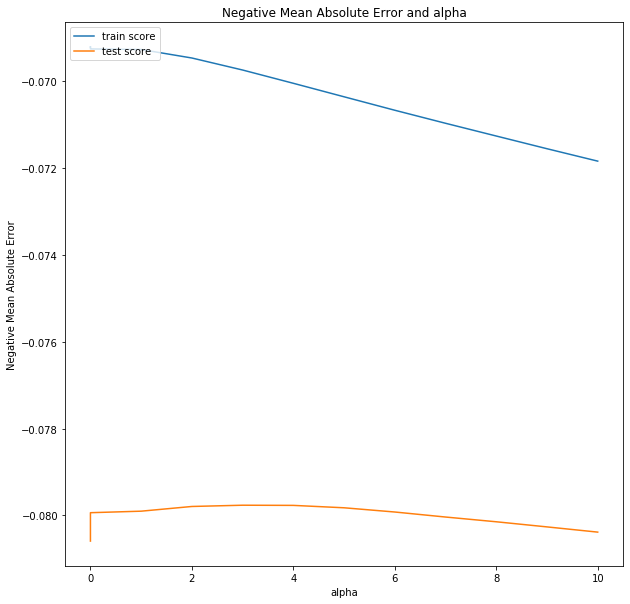

In [1201]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1202]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.96438199e-05,  6.17283016e-06, -1.14761248e-05,  3.23208101e-05,
       -1.41972526e-05,  2.06084348e-04,  1.01587470e-04,  2.23866287e-04,
        2.55776531e-02,  1.98125432e-02,  1.92257418e-02, -3.28257122e-03,
       -1.29004582e-01,  7.26633055e-03,  1.62079244e-04,  8.01796667e-05,
        4.90891437e-05,  1.79930666e-03, -2.48160895e-03, -1.19547235e-03,
       -4.13162462e-05, -1.42744165e-04, -2.94646401e-02, -4.60962579e-02,
       -3.36130618e-03,  3.49655558e-03, -1.10311452e-02,  2.85743528e-02,
       -2.08300975e-02, -1.58993014e-02,  1.96717550e-03, -5.47567388e-03,
       -4.93314476e-02,  5.44177729e-03,  3.85918084e-02, -9.24710893e-03,
        1.22735504e-01, -9.18994717e-02, -2.59240354e-03, -3.93361567e-02,
       -1.34798436e-01, -4.23113771e-02, -2.39389564e-02,  3.73773805e-03,
       -2.68337487e-02,  2.71239409e-02,  8.77329830e-02, -5.65652193e-02,
        1.64838856e-02, -6.41367119e-02, -1.51521913e-02,  9.16227984e-02,
        8.91586784e-02,  

In [1182]:
y_train_pred = model_cv_ridge.predict(X_train)

In [1183]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9264211440957842

In [1184]:
y_test_pred = model_cv_ridge.predict(X_test)

In [1185]:
r2_score(y_test, y_test_pred)

0.8829091684967143

In [1203]:
features_coeff = list(zip(X.columns,ridge.coef_))
features_coeff_sorted = sorted(features_coeff, key = lambda x: x[1], reverse=True) 
features_coeff_sorted

[('MasVnrType_others', 0.14246216071917267),
 ('Neighborhood_Mitchel', 0.1227355043823853),
 ('BldgType_Twnhs', 0.09162279841632018),
 ('BldgType_TwnhsE', 0.08915867841396398),
 ('Neighborhood_StoneBr', 0.08773298295248867),
 ('MasVnrType_None', 0.06630756709910625),
 ('Exterior1st_others', 0.05932679475171241),
 ('OverallCond_2', 0.05039304984811388),
 ('Neighborhood_IDOTRR', 0.038591808418119995),
 ('HouseStyle_others', 0.03702776491521763),
 ('Neighborhood_BrDale', 0.02857435277864842),
 ('Neighborhood_Somerst', 0.027123940887430323),
 ('BedroomAbvGr', 0.02557765313814639),
 ('HeatingQC_TA', 0.024001171380353372),
 ('Exterior1st_Wd Sdng', 0.0203506493452685),
 ('KitchenAbvGr', 0.019812543169687565),
 ('Fireplaces', 0.019225741773043297),
 ('KitchenQual_others', 0.01852171933897564),
 ('Neighborhood_Veenker', 0.016483885575938915),
 ('BsmtQual_others', 0.01581355549010356),
 ('ExterQual_others', 0.014535208836403567),
 ('OverallCond_9', 0.008636727500576405),
 ('Foundation_others', 0

The important predictor variables are :
    ('MasVnrType_others', 0.14246216071917267),
 ('Neighborhood_Mitchel', 0.1227355043823853),
 ('BldgType_Twnhs', 0.09162279841632018),
 ('BldgType_TwnhsE', 0.08915867841396398),
 ('Neighborhood_StoneBr', 0.08773298295248867)

Lasso

In [1187]:
lasso = Lasso()
params_l = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01]}
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params_l, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001,
                                   0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1188]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077862,0.051529,0.002383,0.001907,0.0001,{'alpha': 0.0001},-0.073161,-0.085585,-0.086804,-0.074872,...,-0.079733,0.005536,4,-0.070992,-0.067802,-0.066286,-0.070653,-0.070424,-0.069231,0.001858
1,0.072967,0.046865,0.003242,0.001750,0.0002,{'alpha': 0.0002},-0.072918,-0.085187,-0.086481,-0.075398,...,-0.079471,0.005398,1,-0.071258,-0.068249,-0.066316,-0.070841,-0.070451,-0.069423,0.001869
2,0.062580,0.037423,0.003806,0.006501,0.0003,{'alpha': 0.0003},-0.073014,-0.085302,-0.086378,-0.075965,...,-0.079541,0.005319,2,-0.071771,-0.068764,-0.066710,-0.071203,-0.070840,-0.069858,0.001873
3,0.061335,0.044625,0.000200,0.000399,0.0004,{'alpha': 0.0004},-0.073362,-0.085329,-0.086411,-0.076469,...,-0.079689,0.005200,3,-0.072435,-0.069430,-0.067373,-0.071647,-0.071452,-0.070467,0.001838
4,0.045629,0.028197,0.001871,0.002332,0.0005,{'alpha': 0.0005},-0.073602,-0.085236,-0.086412,-0.077052,...,-0.079839,0.005051,5,-0.073076,-0.070140,-0.068157,-0.072271,-0.072116,-0.071152,0.001782


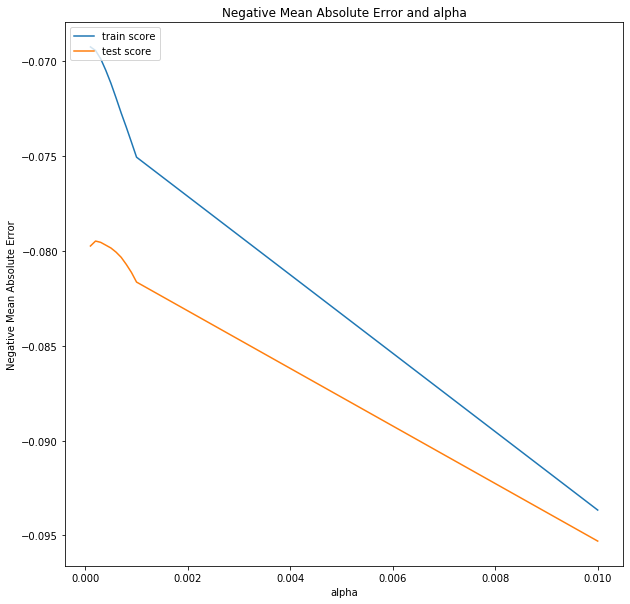

In [1189]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize = (10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1190]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1191]:
lasso.coef_

array([-4.91571252e-06,  5.66493764e-06, -1.83692763e-05,  3.01388006e-05,
       -1.16462151e-05,  2.06178663e-04,  9.70927745e-05,  2.27834412e-04,
        2.76842173e-02,  1.91603696e-02,  1.89391209e-02, -3.18654452e-03,
       -1.48010624e-01,  1.63060799e-03,  1.60520278e-04,  8.14560636e-05,
        3.94601577e-05,  1.78797646e-03, -2.53284688e-03, -1.07502690e-03,
        1.65608867e-05, -2.58361278e-04, -2.70290471e-02, -4.81373651e-02,
       -5.67165136e-04,  5.16081133e-03, -5.60275901e-03,  2.48789044e-02,
       -2.29749130e-02, -1.07924351e-02,  0.00000000e+00, -0.00000000e+00,
       -5.88996289e-02, -0.00000000e+00,  4.64574137e-02, -0.00000000e+00,
        1.34946649e-01, -9.49684182e-02,  4.34018082e-03, -4.27348495e-02,
       -1.91581779e-01, -4.21541454e-02, -2.29826649e-02,  0.00000000e+00,
       -2.55247771e-02,  4.20939213e-02,  1.07744315e-01, -6.15643462e-02,
        6.59558091e-03, -6.65760767e-02, -5.63190376e-03,  1.08777850e-01,
        1.25192484e-01,  

In [1192]:
features_coeff = list(zip(X.columns,lasso.coef_))
features_coeff_sorted = sorted(features_coeff, key = lambda x: x[1], reverse=True) 
features_coeff_sorted

[('MasVnrType_others', 0.21775402224920767),
 ('Neighborhood_Mitchel', 0.13494664934383022),
 ('BldgType_TwnhsE', 0.12519248430766042),
 ('BldgType_Twnhs', 0.10877785003992196),
 ('Neighborhood_StoneBr', 0.10774431490163142),
 ('MasVnrType_None', 0.09908439132157014),
 ('Exterior1st_others', 0.08627565271852432),
 ('OverallCond_2', 0.06615489366553043),
 ('HouseStyle_others', 0.04894697205858187),
 ('Neighborhood_IDOTRR', 0.0464574136618924),
 ('Exterior1st_Wd Sdng', 0.04606813359052376),
 ('Neighborhood_Somerst', 0.04209392127604676),
 ('BedroomAbvGr', 0.027684217347832565),
 ('Neighborhood_BrDale', 0.02487890442738464),
 ('HeatingQC_TA', 0.022934877905909038),
 ('KitchenQual_others', 0.021757922607952247),
 ('BsmtQual_others', 0.019814854393320504),
 ('KitchenAbvGr', 0.019160369610085333),
 ('Fireplaces', 0.01893912088616751),
 ('ExterQual_others', 0.01445083005103075),
 ('OverallCond_9', 0.010172312103301606),
 ('Foundation_others', 0.008961770321873085),
 ('KitchenQual_TA', 0.00754

In [1193]:
y_train_pred = model_cv_lasso.predict(X_train)

In [1194]:
r2_score(y_train, y_train_pred)

0.9266426729628114

In [1195]:
y_test_pred = model_cv_lasso.predict(X_test)

In [1196]:
r2_score(y_test, y_test_pred)

0.8833453232765178

The most important predictor variables are:
    ('MasVnrType_others', 0.21775402224920767),
 ('Neighborhood_Mitchel', 0.13494664934383022),
 ('BldgType_TwnhsE', 0.12519248430766042),
 ('BldgType_Twnhs', 0.10877785003992196),
 ('Neighborhood_StoneBr', 0.10774431490163142)